# Modul 4: Pengantar Machine Learning untuk Analis

## Topik 1: Regresi Linear (Linear Regression)

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [3]:
# 1. Membuat data sederhana
data = {
    'PengalamanKerja': [1, 2, 3, 4, 5, 6, 7, 8],
    'Gaji': [390, 460, 550, 630, 720, 780, 850, 900] # dalam juta per tahun
}
df = pd.DataFrame(data)

In [4]:
# 2. Mendefinisikan variabel X dan Y
X = df[['PengalamanKerja']] # Variabel independen (harus dalam format 2D)
Y = df['Gaji'] # Variabel dependen

In [5]:
# 3. Membuat dan melatih model
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [6]:
# 4. Membuat prediksi
# Misalkan ingin memprediksi gaji untuk seseorang dengan 10 tahun pengalaman
pengalaman_baru = [[10]]
prediksi_gaji = model.predict(pengalaman_baru)
print(f"Prediksi gaji untuk {pengalaman_baru[0][0]} tahun pengalaman: {prediksi_gaji[0]:.2f} juta per tahun.")

Prediksi gaji untuk 10 tahun pengalaman: 1072.50 juta per tahun.


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
# 5. Mengevaluasi model pada data yang ada
prediksi_pada_data_latih = model.predict(X)
r2 = r2_score(Y, prediksi_pada_data_latih)
rmse = np.sqrt(mean_squared_error(Y, prediksi_pada_data_latih))

print(f"\nR-squared (R2) model: {r2:.4f} juta.")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f} juta.")


R-squared (R2) model: 0.9943 juta.
Root Mean Squared Error (RMSE): 12.9904 juta.


## Topik 2: Regresi Logistik (Logistic Regression)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [10]:
# 1. Membuat data sederhana
data = {
    'LamaBerlangganan': [1, 2, 3, 10, 12, 13, 22, 24, 25, 30],
    'TotalBelanja': [50, 60, 70, 300, 350, 400, 600, 650, 700, 800],
    'Churn': [1, 1, 1, 0, 0, 1, 0, 0, 0, 0] # 1 = Churn, 0 = Tidak Churn
}
df = pd.DataFrame(data)

In [11]:
# 2. Mendefinisikan variabel X dan Y
X = df[['LamaBerlangganan', 'TotalBelanja']]
Y = df['Churn']

In [12]:
# 3. Membagi data menjadi data latih dan data uji
# Model akan belajar dari data latih dan diuji pada data uji yang belum pernah ia lihat
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [13]:
# 4. Membuat dan melatih model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [14]:
# 5. Membuat prediksi pada data uji
prediksi = model.predict(X_test)

In [15]:
# 6. Mengevaluasi model
print("Confusion Matrix:\n", confusion_matrix(Y_test, prediksi))
print(f"\nAccuracy: {accuracy_score(Y_test, prediksi):.2f}")
print(f"Precision: {precision_score(Y_test, prediksi):.2f}")
print(f"Recall: {recall_score(Y_test, prediksi):.2f}")

Confusion Matrix:
 [[1 0]
 [1 1]]

Accuracy: 0.67
Precision: 1.00
Recall: 0.50


## Topik 3: Clustering (K-Means)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
# 1. Membuat data pelanggan sederhana
data = {
    'PendapatanTahunan': [15, 15, 16, 16, 17, 18, 18, 29, 20, 20, 21, 21, 23, 25, 28, 28, 29, 30, 33, 35],
    'SkorBelanja': [39, 81, 6, 77, 40, 90, 6, 73, 35, 79, 35, 83, 29, 73, 42, 86, 14, 73, 21, 99]
}
df = pd.DataFrame(data)

In [5]:
# 2. Membuat dan melatih model K-Means
# Akan dicoba membuat 5 cluster pelanggan
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['PendapatanTahunan', 'SkorBelanja']])

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


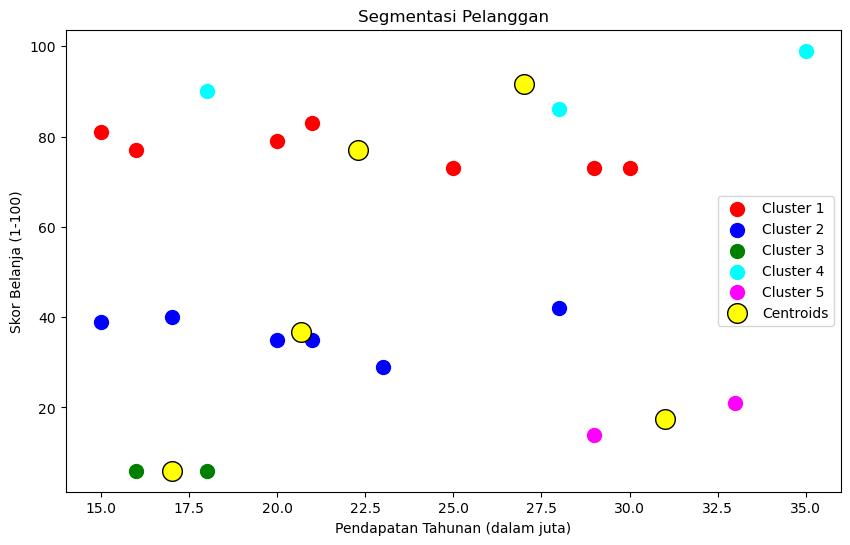

In [7]:
# 3. Visualisasi Hasil Clustering
plt.figure(figsize=(10, 6))
# Scatter plot untuk setiap cluster
plt.scatter(df[df['Cluster'] == 0]['PendapatanTahunan'], df[df['Cluster'] == 0]['SkorBelanja'], s=100, c='red', label='Cluster 1')
plt.scatter(df[df['Cluster'] == 1]['PendapatanTahunan'], df[df['Cluster'] == 1]['SkorBelanja'], s=100, c='blue', label='Cluster 2')
plt.scatter(df[df['Cluster'] == 2]['PendapatanTahunan'], df[df['Cluster'] == 2]['SkorBelanja'], s=100, c='green', label='Cluster 3')
plt.scatter(df[df['Cluster'] == 3]['PendapatanTahunan'], df[df['Cluster'] == 3]['SkorBelanja'], s=100, c='cyan', label='Cluster 4')
plt.scatter(df[df['Cluster'] == 4]['PendapatanTahunan'], df[df['Cluster'] == 4]['SkorBelanja'], s=100, c='magenta', label='Cluster 5')

# Menampilkan centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids', edgecolors='black')

plt.title('Segmentasi Pelanggan')
plt.xlabel('Pendapatan Tahunan (dalam juta)')
plt.ylabel('Skor Belanja (1-100)')
plt.legend()
plt.show()